In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import symmetric_top as sy
import euler_omega as eo
from numpy import linalg as la

In this notebook how to work it is illustrated how to work with the symetric_top module

In [2]:
alpha = 10.0
beta = 2.0
a = 1.0
b = 3.0
i_rat = 0.5

We introduce

alpha=$\alpha=\frac{2E-I_3\omega_3^2}{I}$

beta =$\beta=\frac{2Mg l}{I}$

a = $a=\frac{p_{\psi}}{I}$

b = $b=\frac{p_{\phi}}{I}$

i_rat = $\frac{I}{I_3}a$

and now, with these parameters we create the class

In [3]:
st = sy.SymTopIniCond(alpha, beta, a, b, i_rat)

Motion confined between  0.950280552598  and  1.7406338675
Half period is 1.0065777848929287


Now, we are going to look at the function $f(u)$, which becomes zero at $u=u_l, u_r$. 

Let us print those values:


In [4]:
print('This is the smallest value', st.u_l)
print('This is the largest value ', st.u_r)
print('This is u prime ', st.u_prime)

This is the smallest value -0.16902222942417586
This is the largest value  0.5814548607419053
This is u prime  3.0


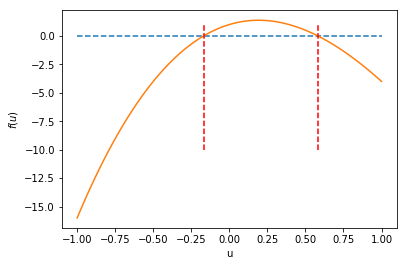

In [5]:
uval = np.linspace(-1, 1, 100)
plt.plot(uval, np.zeros_like(uval), '--')
plt.plot(uval, st.f_top(uval))
plt.plot(st.u_l*np.ones_like(uval),np.linspace(-10, 1, uval.shape[0]), 'r--')
plt.plot(st.u_r*np.ones_like(uval),np.linspace(-10, 1, uval.shape[0]), 'r--')
plt.xlabel(r'u')
plt.ylabel(r'$f(u)$')
plt.show()

Let us solve the diferential equation at equispaced points in time within a single period.

In [6]:
num_pnts = 200
num_periods = 2
sol = st.solv_eqn(num_pnts, num_periods)

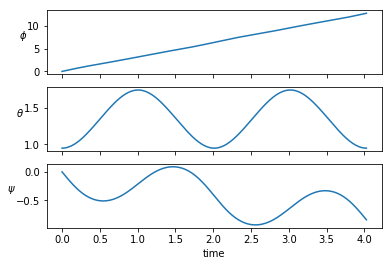

In [7]:
fig, ax = plt.subplots(3, sharex=True)
var = [r'$\phi$', r'$\theta$', r'$\psi$']
for ind in range(3):
    ax[ind].plot(st.time, sol[:, ind])    
    yl = ax[ind].set_ylabel(var[ind])
    yl.set_rotation(0)
ax[2].set_xlabel('time')
plt.show()

Let us visualize the trajectory in 3d space

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


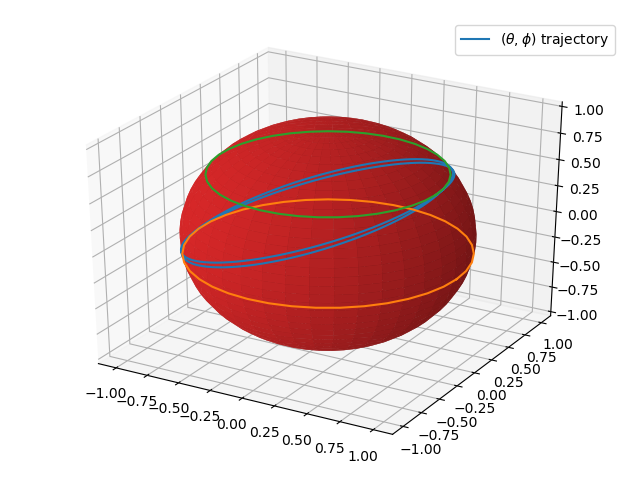

In [9]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.sin(sol[:, 1])*np.cos(sol[:, 0])
y = np.sin(sol[:, 1])*np.sin(sol[:, 0])
z = np.cos(sol[:, 1])
ax.plot(x, y, z, label=r'$(\theta, \phi)$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

theta = [st.th_1, st.th_2]
for inv, th in enumerate(theta):
    x = np.sin(th)*np.cos(vs)
    y = np.sin(th)*np.sin(vs)
    z = np.cos(th)
    ax.plot(x, y, z)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


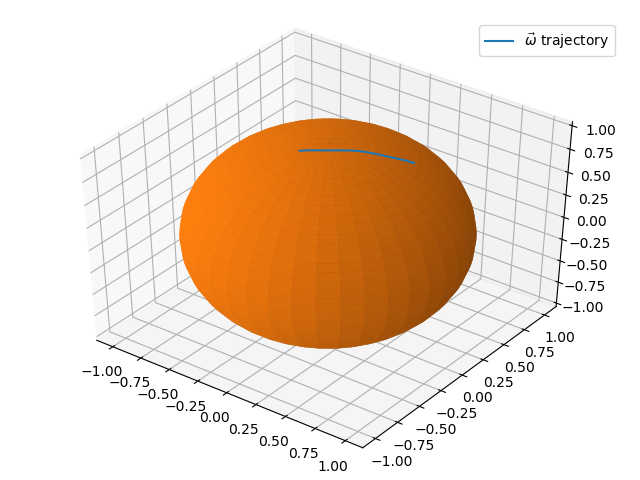

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# define angle and velocity
angle_euler = sol
velo_euler = np.zeros_like(angle_euler)

# define a helper function that contains derivatives
velo_helper = st.ode_int(st.solv_eqn.T, 0.0)

# The order of the Euler angles has been chosen as [he, theta, phi, psi]
velo_euler[:, 0] = velo_helper.T[:, 2]
velo_euler[:, 1] = velo_helper.T[:, 1]
velo_euler[:, 2] = velo_helper.T[:, 3]
# remember that :math:'\\dot{\\theta}=-\\dot{u}//sin(\\theta)`
velo_euler[:, 1] = - velo_euler[:, 1]/np.sin(angle_euler[:, 1])

omega = eo.omega_body(angle_euler.T, velo_euler.T)
#omega = eo.omega_reference(angle_euler.T, velo_euler.T)

w = omega/la.norm(omega, axis=0)

ax.plot(w[0], w[1], w[2],  label=r'${\vec \omega}$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

In [11]:
print(omega)

[[ 0.         -0.01361253 -0.02722699 -0.04084513 -0.0544687  -0.0680993
  -0.08173869 -0.09538832 -0.10904956 -0.12272364 -0.13641159 -0.15011428
  -0.16383232 -0.17756616 -0.19131593 -0.20508154 -0.21886264 -0.23265856
  -0.24646839 -0.26029089 -0.27412452 -0.28796742 -0.30181744 -0.31567211
  -0.32952866 -0.34338402 -0.35723481 -0.37107738 -0.38490782 -0.39872195
  -0.41251536 -0.42628343 -0.44002132 -0.45372406 -0.4673865  -0.48100342
  -0.49456949 -0.50807933 -0.52152758 -0.53490887 -0.54821791 -0.56144949
  -0.57459855 -0.58766021 -0.60062977 -0.61350281 -0.62627519 -0.63894306
  -0.65150297 -0.66395181 -0.67628694 -0.6885061  -0.70060756 -0.71259004
  -0.7244528  -0.73619563 -0.74781885 -0.75932332 -0.77071052 -0.7819824
  -0.7931416  -0.80419118 -0.81513479 -0.82597667 -0.83672154 -0.84737464
  -0.85794168 -0.86842888 -0.87884285 -0.88919065 -0.89947971 -0.90971781
  -0.91991306 -0.93007385 -0.94020879 -0.95032675 -0.96043676 -0.97054798
  -0.98066967 -0.99081116 -1.00098179 -1